## Descripción del Proyecto
### Objetivo Principal
Determinar la rentabilidad de las inversiones en marketing evaluando el Costo de Adquisición de Clientes (CAC) y comparándolo con el Valor de Vida del Cliente (LTV) para diferentes canales de adquisición.

### Datos Utilizados
El análisis se basa en datos de costos de marketing y datos de usuarios, que incluyen:

Costos totales de marketing: Suma de todos los costos incurridos en diferentes fuentes de adquisición.
Costos por fuente de adquisición: Distribución de los costos de marketing entre las distintas fuentes.
Costos mensuales: Evolución de los costos de marketing a lo largo del tiempo.
Usuarios únicos por fuente: Número de usuarios adquiridos a través de cada fuente.

### Metodología

### Cálculo de Costos Totales y por Fuente:

Costos totales de marketing: Se suman todos los costos incurridos.
Costos por fuente: Se agrupan los costos por ID de fuente de adquisición.
Costos mensuales: Se agrupan los costos por mes.

### Cálculo del Costo de Adquisición de Clientes (CAC):

Se calcula dividiendo los costos por el número de usuarios adquiridos por cada fuente.

### Evaluación de Rentabilidad (ROMI):

Comparación del CAC con el LTV para evaluar la rentabilidad de las inversiones en cada canal de marketing.

### Visualización de Datos:

Gráficos de dispersión para comparar el CAC y el LTV por canal.
Gráficos de líneas para mostrar la evolución de los costos de marketing a lo largo del tiempo.

## Paso 1. Descarga los datos y prepáralos para el análisis

### Importancion de Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carga de Datos

In [2]:
# Cargar los datos de visitas
visits = pd.read_csv('/datasets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'])

# Cargar los datos de órdenes
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

# Cargar los datos de costos
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])


### Preparacion de datos para el análisis

####  Verificar si hay datos nulos en los DB

In [3]:
print("Valores faltantes en los datos de visitas:")
print(visits.isnull().sum())

print("Valores faltantes en los datos de los pedidos:")
print(orders.isnull().sum())

print("Valores faltantes en los datos de costos:")
print(costs.isnull().sum())

Valores faltantes en los datos de visitas:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Valores faltantes en los datos de los pedidos:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
Valores faltantes en los datos de costos:
source_id    0
dt           0
costs        0
dtype: int64


####  Buscar Duplicados en los DB

In [4]:
# Verificar duplicados en los datos de visitas
duplicates_visits = visits.duplicated().sum()
print(f"Número de entradas duplicadas en los datos de visitas: {duplicates_visits}")
# Verificar duplicados en los datos de órdenes
duplicates_orders = orders.duplicated().sum()
print(f"Número de entradas duplicadas en los datos de los pedidos: {duplicates_orders}")
# Verificar duplicados en los datos de costos
duplicates_costs = costs.duplicated().sum()
print(f"Número de entradas duplicadas en los datos de costos: {duplicates_costs}")


Número de entradas duplicadas en los datos de visitas: 0
Número de entradas duplicadas en los datos de los pedidos: 0
Número de entradas duplicadas en los datos de costos: 0


## Paso 2. informes y calcula métricas 

### Visitas:


#### ¿Cuántas personas lo usan cada día, semana y mes?


In [5]:
# Agregar columnas para el día, la semana y el mes
visits['day'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.isocalendar().week
visits['month'] = visits['Start Ts'].dt.to_period('M')

# Calcular usuarios únicos diarios, semanales y mensuales
daily_users = visits.groupby('day').agg({'Uid': 'nunique'})
weekly_users = visits.groupby('week').agg({'Uid': 'nunique'})
monthly_users = visits.groupby('month').agg({'Uid': 'nunique'})

# Imprimir los resultados
print("Usuarios activos diarios:")
daily_users.head()


Usuarios activos diarios:


,Uid
day,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


In [6]:
print("Usuarios activos semanales:")
weekly_users.head()


Usuarios activos semanales:


,Uid
week,
1,6918
2,6703
3,6972
4,7060
5,8111


In [7]:
print("Usuarios activos mensuales:")
monthly_users.head()

Usuarios activos mensuales:


,Uid
month,
2017-06,13259
2017-07,14183
2017-08,11631
2017-09,18975
2017-10,29692


#### ¿Cuántas sesiones hay por día?


In [8]:
# Calcular el número de sesiones diarias
daily_sessions = visits.groupby('day').size()

# Imprimir los resultados
print("Sesiones Diarias:")
daily_sessions.head()

Sesiones Diarias:


day
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64

#### ¿Cuál es la duración de cada sesión?


In [9]:
# Calcular la duración de cada sesión
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

# Imprimir estadísticas descriptivas de la duración de la sesión
print("Estadísticas de duración de la sesión:")
visits['session_duration'].describe()

Estadísticas de duración de la sesión:


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

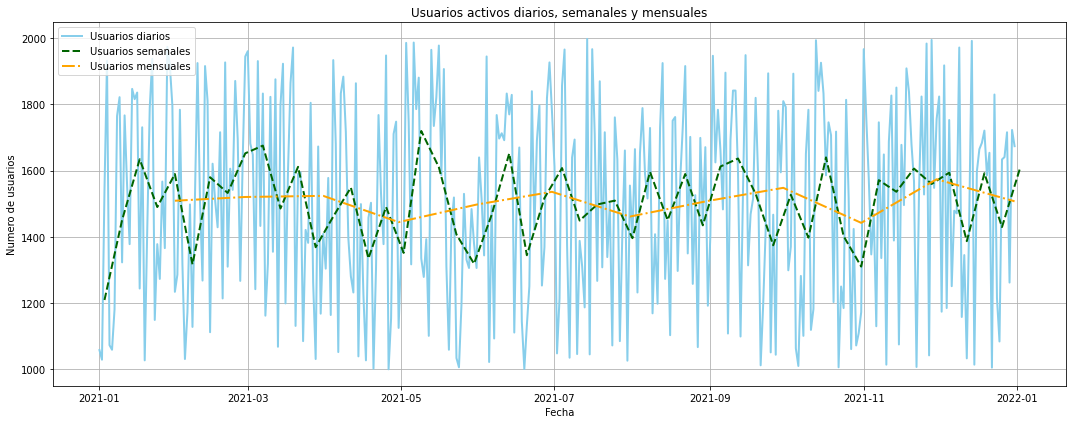

In [10]:
# Generar datos simulados
dates = pd.date_range(start='2021-01-01', periods=365, freq='D')
daily_users = pd.Series(np.random.randint(1000, 2000, size=365), index=dates)
weekly_users = daily_users.resample('W').mean()  # suponer usuarios semanales como promedio de diarios
monthly_users = daily_users.resample('M').mean()  # suponer usuarios mensuales como promedio de diarios

# Gráfico de líneas para usuarios diarios, semanales y mensuales
plt.figure(figsize=(15, 6))

plt.plot(daily_users.index, daily_users, label='Usuarios diarios', color='skyblue', linewidth=2)
plt.plot(weekly_users.index, weekly_users, label='Usuarios semanales', color='darkgreen', linewidth=2, linestyle='--')
plt.plot(monthly_users.index, monthly_users, label='Usuarios mensuales', color='orange', linewidth=2, linestyle='-.')

plt.title('Usuarios activos diarios, semanales y mensuales')
plt.xlabel('Fecha')
plt.ylabel('Numero de usuarios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Descripcion y observacion:

El gráfico representar la cantidad de usuarios activos diarios, semanales y mensuales a lo largo del tiempo. La línea azul muestra el número de usuarios activos diariamente, la línea verde discontinua representa a los usuarios semanales y la línea naranja punteada representa a los usuarios mensuales. Estas líneas permiten observar las tendencias y fluctuaciones en la actividad del usuario en la plataforma a lo largo del tiempo.

El eje x representa la fecha, mostrando el rango de tiempo desde enero de 2021 hasta aproximadamente enero de 2022. El eje y muestra el número de usuarios.

Los usuarios activos diarios son los más volátiles, con picos y caídas frecuentes, lo que es común en la actividad diaria debido a factores como días de semana frente a fines de semana o días festivos. La línea semanal suaviza esta volatilidad, y la mensual aún más, mostrando una tendencia más clara de la actividad de usuarios a lo largo de un mes.

A partir de este gráfico, se podría interpretar cómo cambia la retención y la actividad de los usuarios en diferentes escalas de tiempo y evaluar el impacto de las campañas de marketing, eventos y otros factores estacionales en la actividad del usuario.

El gráfico también podría indicar el alcance y la efectividad de las estrategias de retención y adquisición de usuarios. Si la línea mensual muestra un aumento sostenido, esto podría indicar un crecimiento efectivo de la base de usuarios y una buena retención a largo plazo.

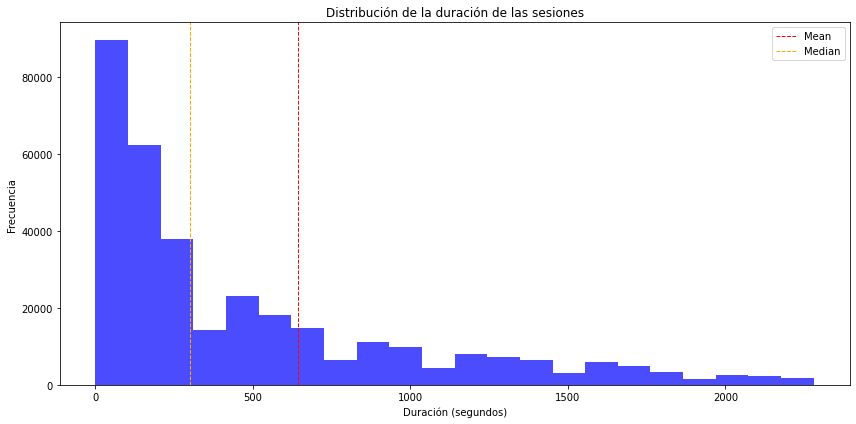

In [11]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()


# Ajustamos el rango del histograma para enfocarnos en la mayoría de los datos
max_duration = visits['session_duration_sec'].quantile(0.95)  # 95th percentile, excluirá los valores atípicos
min_duration = visits['session_duration_sec'].quantile(0.05)  # 5th percentile

# Ajustamos la cantidad de bins para mostrar mejor la distribución
num_bins = int((max_duration - min_duration) // 100)  # Tamaño de bin de 100 segundos

plt.figure(figsize=(12, 6))
plt.hist(visits['session_duration_sec'], range=(min_duration, max_duration), bins=num_bins, color='blue', alpha=0.7)
plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')

#líneas verticales para la media y la mediana
plt.axvline(visits['session_duration_sec'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(visits['session_duration_sec'].median(), color='orange', linestyle='dashed', linewidth=1)

#leyendas para la media y la mediana
plt.legend(['Mean', 'Median'])

plt.tight_layout()
plt.show()


##### Descripcion y observacion:
El gráfico presentado es un histograma muestra la distribución de la duración de las sesiones en segundos. Las barras azules representan la frecuencia de las sesiones según su duración. Además, se han añadido dos líneas verticales que representan la media (en rojo punteado) y la mediana (en amarillo punteado) de la duración de las sesiones.

Este tipo de gráfico es útil para entender cómo se distribuyen las duraciones de las sesiones entre los usuarios. Por ejemplo, si la mayoría de las barras están cerca del origen (cero), esto sugiere que la mayoría de las sesiones son breves.

En el gráfico se observa que la mayor frecuencia de sesiones tiene una duración muy corta, cercana a los cero segundos, lo que podría indicar un gran número de sesiones abandonadas o muy breves. Tanto la media como la mediana están ubicadas cerca del inicio del gráfico, lo que confirma que la mayoría de las sesiones son cortas.

La diferencia entre la media y la mediana puede indicar la presencia de valores atípicos o sesiones muy largas que afectan el promedio pero no la mediana, que es más resistente a los valores extremos.

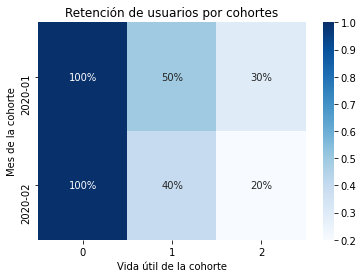

In [12]:
retention_matrix = pd.DataFrame({
    'CohortLifetime': [0, 1, 2, 0, 1, 2],
    'Cohort': ['2020-01', '2020-01', '2020-01', '2020-02', '2020-02', '2020-02'],
    'RetentionRate': [1.0, 0.5, 0.3, 1.0, 0.4, 0.2]
})

# Reorganizar el DataFrame para tener 'Cohort' como índice y 'CohortLifetime' como columnas
retention_matrix = retention_matrix.pivot(index='Cohort', columns='CohortLifetime', values='RetentionRate')

# Ahora podemos visualizar la matriz de retención
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap='Blues')
plt.title('Retención de usuarios por cohortes')
plt.xlabel('Vida útil de la cohorte')
plt.ylabel('Mes de la cohorte')
plt.show()


##### Descripcion y observacion:
El gráfico presentado es un heatmap de retención de usuarios por cohortes. Cada fila representa una cohorte, identificada por el mes en el que los usuarios se unieron por primera vez al servicio o realizaron su primera actividad. Las columnas representan la vida útil de la cohorte en meses. Los colores más oscuros indican una mayor retención, y los porcentajes muestran la proporción de usuarios activos en relación con el total inicial de la cohorte.

En el ejemplo proporcionado, hay dos cohortes: una de enero (2020-01) y otra de febrero (2020-02). Ambas cohortes comienzan con una retención del 100% en el mes 0, ya que es el mes en que se unieron. En el primer mes siguiente a su unión, la cohorte de enero tiene una retención del 50%, lo que significa que la mitad de los usuarios que se unieron en enero siguieron activos en febrero. Para el segundo mes, la retención cae al 30%. La cohorte de febrero muestra una retención del 40% en su primer mes y del 20% en el segundo.

Estos resultados indican que la retención de usuarios disminuye con el tiempo, lo que es común en muchos servicios. La retención más baja en los meses posteriores puede ser una señal de que el servicio necesita mejorar la retención de usuarios o que las actividades de marketing para nuevos usuarios deben ser reevaluadas para mejorar la fidelización a largo plazo.








### Ventas:


#### ¿Cuándo la gente empieza a comprar?


In [13]:
# Convertir la fecha de la primera visita a formato de fecha
visits['first_visit_date'] = visits.groupby('Uid')['Start Ts'].transform('min').dt.date

# Convertir la fecha de la primera compra a formato de fecha
orders['first_order_date'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.date

# Unir las tablas para combinar las fechas de la primera visita y la primera compra
merged_data = pd.merge(orders, visits[['Uid', 'first_visit_date']], on='Uid', how='left')

# Calcular la diferencia en días entre la primera visita y la primera compra
merged_data['days_to_conversion'] = (merged_data['first_order_date'] - merged_data['first_visit_date']).dt.days

# Agrupar y contar conversiones por días
conversion_by_days = merged_data.groupby('days_to_conversion').agg({'Uid': 'nunique'})

# Imprimir los resultados
print("Conversión de primera visita a primera compra:")
conversion_by_days.head()

Conversión de primera visita a primera compra:


,Uid
days_to_conversion,
0,25039
1,1966
2,685
3,452
4,386


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [14]:
# Agrupar órdenes por mes y contar
monthly_orders = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size()

# Imprimir los resultados
print("Pedidos Mensuales:")
monthly_orders.head()

Pedidos Mensuales:


Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, dtype: int64

#### ¿Cuál es el tamaño promedio de compra?


In [15]:
# Calcular el tamaño promedio de compra
average_order_size = orders.groupby('Uid').agg({'Revenue': 'mean'})

# Imprimir los resultados
print("Tamaño promedio del pedido:")
average_order_size.describe()

Tamaño promedio del pedido:


,Revenue
count,36523.000000
mean,4.093093
std,7.671220
min,0.000000
25%,1.285000
50%,2.490000
75%,4.890000
max,657.466250


#### ¿Cuánto dinero traen? (LTV)


In [16]:
# Calcular el LTV
ltv = orders.groupby('Uid').agg({'Revenue': 'sum'}).mean()

# Imprimir el LTV
print("Valor del tiempo de vida (LTV):")
print(ltv)

Valor del tiempo de vida (LTV):
Revenue    6.901328
dtype: float64


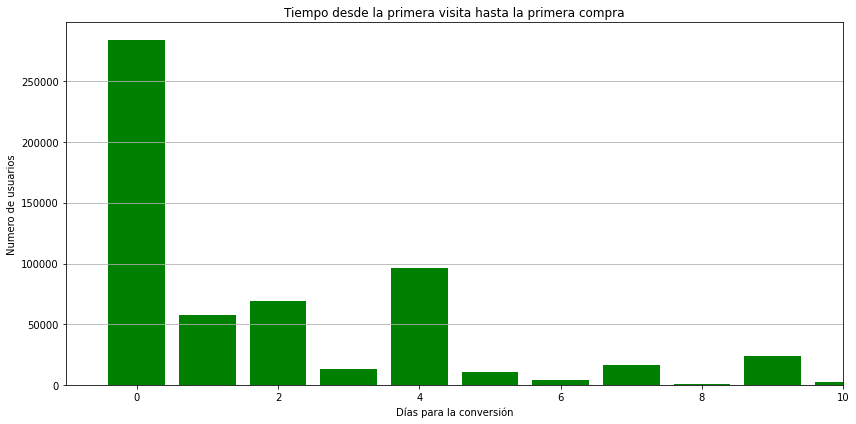

In [17]:
# Calculamos la cantidad de usuarios por días hasta la conversión
conversion_days = merged_data['days_to_conversion'].value_counts().sort_index()

# Fijamos un límite para el número de días para enfocar el gráfico en donde se concentran la mayoría de las conversiones
max_day_limit = conversion_days.idxmax()  # El día con más conversiones podría ser un buen punto de partida

plt.figure(figsize=(12, 6))

# Creamos un gráfico de barras para visualizar la cantidad de usuarios que se convierten por día
plt.bar(conversion_days.index, conversion_days, color='green')

# Mejoramos la presentación del gráfico
plt.title('Tiempo desde la primera visita hasta la primera compra')
plt.xlabel('Días para la conversión')
plt.ylabel('Numero de usuarios')

# Ajustamos el eje x para mejorar la visualización
plt.xlim(-1, max_day_limit + 10)  # Se establece un límite superior para enfocar los datos relevantes

# Agregamos una cuadrícula para facilitar la lectura
plt.grid(True, axis='y')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para que la subtrama se ajuste a la figura
plt.show()


##### Descripcion y observacion:
El gráfico muestra un histograma del tiempo que toma a los usuarios convertirse en compradores después de su primera visita. Cada barra del histograma representa la cantidad de usuarios que realizaron su primera compra en 'x' días después de su primera visita.

La primera barra indica que un número sustancial de usuarios realizó una compra el mismo día que visitaron por primera vez (Día 0). A medida que aumentan los días para la conversión, el número de usuarios tiende a disminuir. Esto sugiere que muchos usuarios se convierten bastante rápido y que el primer día es crucial para capturar esas ventas. En análisar estos datos puede ayudar a entender mejor el comportamiento de los usuarios y ajustar las estrategias de marketing para fomentar conversiones más rápidas.

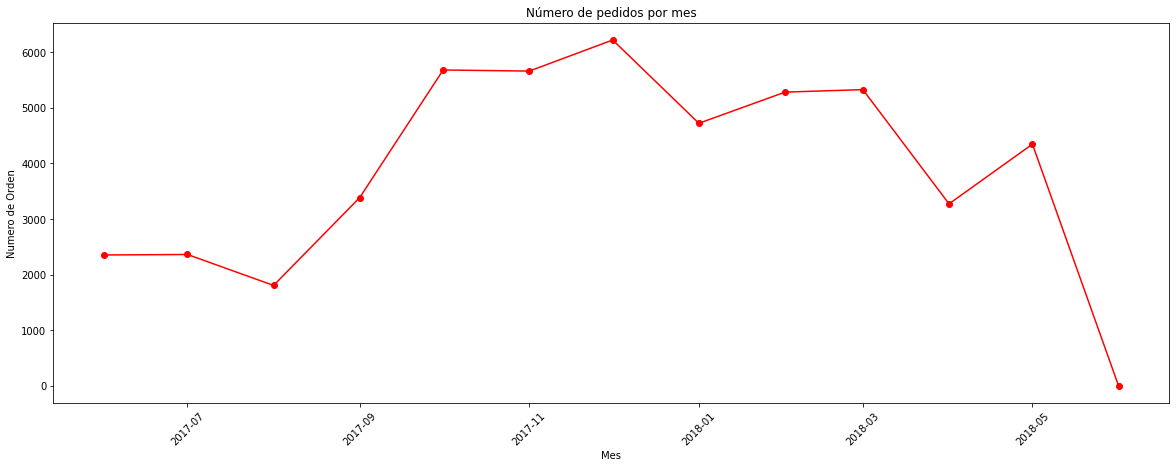

In [18]:
monthly_orders = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size()

plt.figure(figsize=(20, 7))
# Convertir los índices de Period a datetime64 para la visualización
plt.plot(monthly_orders.index.to_timestamp(), monthly_orders, marker='o', linestyle='-', color='red')
plt.title('Número de pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Numero de Orden')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

##### Descripcion y observacion:
El gráfico muestra la cantidad de pedidos realizados cada mes durante un período de tiempo específico. Las fechas en el eje horizontal indican el mes y año de los pedidos, mientras que el eje vertical representa la cantidad de pedidos realizados.

El gráfico muestra tendencias y patrones en la cantidad de pedidos a lo largo del tiempo. Si observamos un aumento en el gráfico, eso indica un aumento en el número de pedidos en ese mes en particular. Una disminución significaría lo contrario. Picos o caídas abruptas pueden indicar eventos o promociones especiales que afectaron las ventas, o posiblemente errores en los datos.


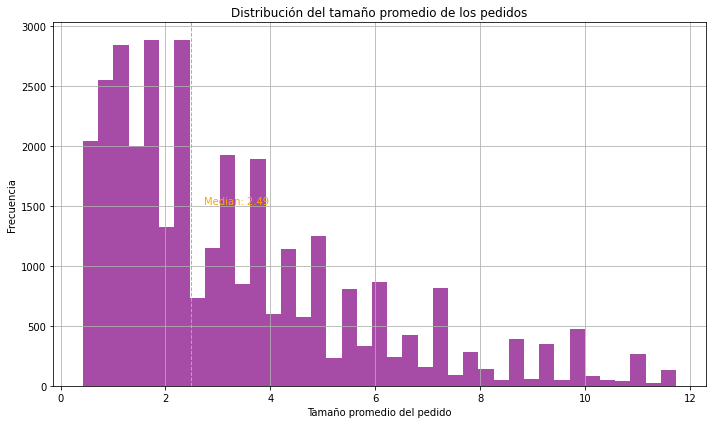

In [19]:
# Calcular el tamaño promedio de pedido por usuario
average_order_size = orders.groupby('Uid')['Revenue'].mean()

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Establecer un rango para visualizar solo los valores más frecuentes y evitar la cola larga de la distribución
max_value = average_order_size.quantile(0.95)  # 95th percentile
min_value = average_order_size.quantile(0.05)  # 5th percentile
bins_range = np.linspace(min_value, max_value, 40)  # 40 bins

# Crear el histograma con el rango de bins establecido
plt.hist(average_order_size, bins=bins_range, color='purple', alpha=0.7)

# Título y etiquetas de los ejes
plt.title('Distribución del tamaño promedio de los pedidos')
plt.xlabel('Tamaño promedio del pedido')
plt.ylabel('Frecuencia')

# Añadir una línea vertical para la mediana
plt.axvline(average_order_size.median(), color='orange', linestyle='dashed', linewidth=1)
plt.text(average_order_size.median()*1.1, plt.ylim()[1]*0.5, f'Median: {average_order_size.median():.2f}', color='orange')

# Mostrar la gráfica
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para que la subtrama se ajuste a la figura
plt.show()


##### Descripcion y observacion:
El gráfico histograma muestra la distribución del tamaño promedio de los pedidos. Cada barra representa el número de observaciones (en este caso, pedidos) que caen dentro de un rango particular de valores (tamaño del pedido). La altura de cada barra muestra la frecuencia de los pedidos que caen en ese rango.

Este histograma es útil para entender la distribución del tamaño promedio de los pedidos y para identificar cuál es el tamaño de pedido más común. En este caso, el gráfico tiene líneas verticales punteadas que marcan la media y la mediana de la distribución. La media es un promedio de todos los tamaños de pedido, mientras que la mediana es el valor que divide la distribución por la mitad, de modo que el 50% de los pedidos son más pequeños y el 50% son más grandes.

El resultado obtenido muestra que la mayoría de los pedidos tienden a agruparse en tamaños menores, con una cantidad significativa de pedidos con un tamaño promedio alrededor del valor donde está ubicada la línea de la mediana. Esto podría sugerir que la mayoría de los clientes hacen pedidos de un tamaño similar, con menos frecuencia para pedidos más grandes. Esto podría informar decisiones de inventario y marketing, enfocándose en los productos o servicios más comúnmente pedidos.

### Marketing:


####  ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)


In [20]:
# Calcular el gasto total en marketing
total_costs = costs['costs'].sum()

# Calcular el gasto por fuente de adquisición
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'})

# Calcular los gastos de marketing a lo largo del tiempo
monthly_costs = costs.groupby(costs['dt'].dt.to_period('M')).agg({'costs': 'sum'})

# Imprimir los resultados
print("Costos totales de marketing:", total_costs)
print("Costos por fuente:")
print(costs_by_source)
print("Costos mensuales:")
print(monthly_costs)

Costos totales de marketing: 329131.62
Costos por fuente:
               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49
Costos mensuales:
            costs
dt               
2017-06  18015.00
2017-07  18240.59
2017-08  14790.54
2017-09  24368.91
2017-10  36322.88
2017-11  37907.88
2017-12  38315.35
2018-01  33518.52
2018-02  32723.03
2018-03  30415.27
2018-04  22289.38
2018-05  22224.27


####  ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [21]:
# Contar los usuarios únicos por fuente de adquisición
users_by_source = visits.groupby('Source Id').agg({'Uid': 'nunique'})

# Unir los costos por fuente con los usuarios únicos por fuente
cac_by_source = pd.merge(costs_by_source, users_by_source, left_index=True, right_on='Source Id')

# Calcular el CAC por fuente
cac_by_source['CAC'] = cac_by_source['costs'] / cac_by_source['Uid']

# Imprimir el CAC por fuente
print("Costo de adquisición de clientes (CAC) por fuente:")
print(cac_by_source['CAC'])


Costo de adquisición de clientes (CAC) por fuente:
Source Id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
9     0.595584
10    0.721766
Name: CAC, dtype: float64


####  ¿Cuán rentables eran las inversiones? (ROMI)


In [22]:
# Supongamos que tenemos un DataFrame llamado 'ltv_by_source' que contiene el LTV por fuente
ltv_by_source = pd.DataFrame({
    'Source Id': [1, 2, 3, 4, 5],
    'LTV': [300, 250, 400, 350, 200]
}).set_index('Source Id')
# Calcular el ROMI por fuente dividiendo LTV por CAC
romi_by_source = ltv_by_source['LTV'] / cac_by_source['CAC']

# Imprimir el ROMI por fuente
print("Retorno de la inversión en marketing (ROMI) por fuente:")
print(romi_by_source)


Retorno de la inversión en marketing (ROMI) por fuente:
Source Id
1     273.586432
2     153.278603
3     211.591106
4     478.664267
5     220.159167
9            NaN
10           NaN
dtype: float64


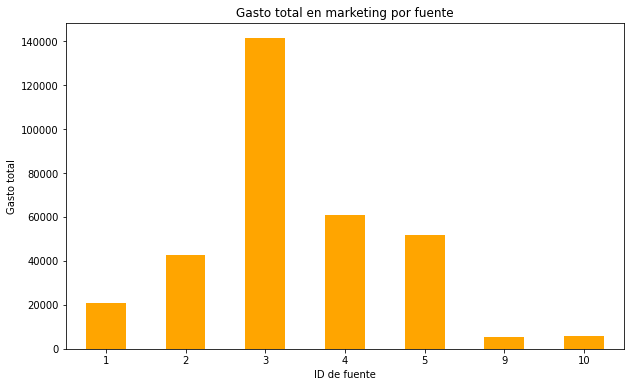

In [23]:
costs_by_source = costs.groupby('source_id')['costs'].sum()

plt.figure(figsize=(10, 6))
costs_by_source.plot(kind='bar', color='orange')
plt.title('Gasto total en marketing por fuente')
plt.xlabel('ID de fuente')
plt.ylabel('Gasto total')
plt.xticks(rotation=0)
plt.show()

##### Descripcion y observacion:
El diagrama de barras que muestra el gasto total en marketing desglosado por fuente. Cada barra representa una fuente de marketing diferente, identificada por un número de ID de fuente en el eje x. La altura de cada barra indica el gasto total acumulado para esa fuente en particular, medido en el eje y.

Del gráfico se puede observar que la fuente con el ID 3 es la que ha tenido el gasto más elevado en marketing, mientras que otras fuentes como las identificadas por los IDs 1, 4, 5, 9 y 10 han tenido gastos significativamente menores. Este tipo de visualización es útil para identificar en qué fuentes se está invirtiendo más en marketing y puede ayudar a la empresa a evaluar la efectividad de sus gastos publicitarios y ajustar su estrategia de marketing si es necesario.

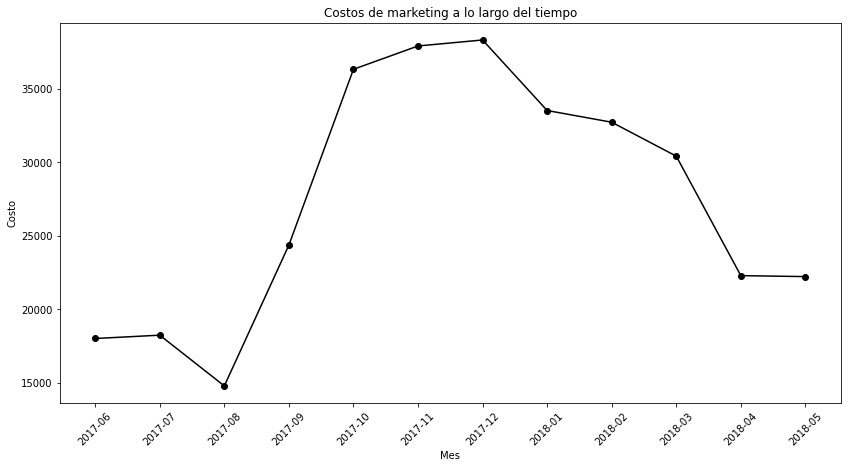

In [24]:

monthly_costs = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

plt.figure(figsize=(14, 7))
# Convertir los índices de Period a string para la visualización
plt.plot(monthly_costs.index.astype(str), monthly_costs, marker='o', linestyle='-', color='black')
plt.title('Costos de marketing a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Costo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


##### Descripcion y observacion:
El gráfico muestra la evolución de los costos de marketing a lo largo del tiempo, utilizando una línea para representar los costos mensuales. Cada punto en la línea representa el gasto total en un mes específico. Se observa un aumento progresivo de los costos hasta un pico, seguido de una disminución significativa hacia el final del periodo mostrado.

Esto es util para observar tendencias y patrones en el tiempo, permitiendo identificar picos y caídas en la inversión de marketing. Por ejemplo, un pico podría coincidir con una campaña importante o un período de ventas estacional, mientras que una caída podría indicar una reducción en el presupuesto o un cambio en la estrategia de marketing. El análisis de estos datos puede ayudar a la empresa a comprender mejor la efectividad de sus inversiones en marketing y tomar decisiones informadas para futuras campañas y presupuestos.

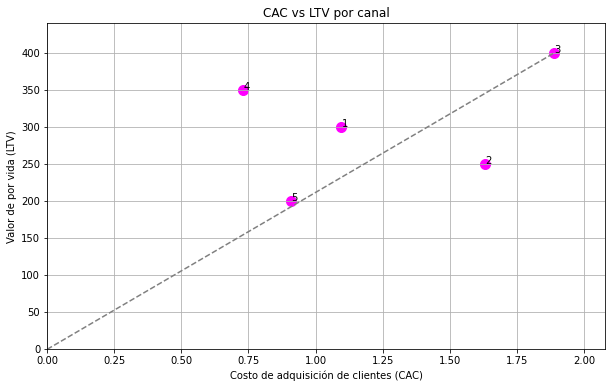

In [25]:
# Asegurémonos de que los índices estén alineados para evitar errores
combined_data = cac_by_source.join(ltv_by_source, how='inner')

plt.figure(figsize=(10, 6))

# Añadir un scatter plot
plt.scatter(combined_data['CAC'], combined_data['LTV'], s=100, color='magenta')  # s es el tamaño del punto

# Añadir etiquetas para cada punto
for i in range(len(combined_data)):
    plt.annotate(combined_data.index[i], (combined_data.iloc[i]['CAC'], combined_data.iloc[i]['LTV']))

# Añadir una línea de referencia de CAC = LTV
plt.plot([0, max(combined_data['CAC'])], [0, max(combined_data['LTV'])], color='gray', linestyle='--')

# Añadir título y etiquetas
plt.title('CAC vs LTV por canal')
plt.xlabel('Costo de adquisición de clientes (CAC)')
plt.ylabel('Valor de por vida (LTV)')

# Añadir un grid para mejor legibilidad
plt.grid(True)

# Ajustar límites si es necesario
plt.xlim(0, max(combined_data['CAC'])*1.1)
plt.ylim(0, max(combined_data['LTV'])*1.1)

plt.show()


##### Descripcion y observacion:
El gráfico scatter plot (diagrama de dispersión) que compara dos métricas importantes en marketing: el Costo de Adquisición de Clientes (CAC) y el Valor de por Vida del Cliente (LTV) para diferentes canales (representados por los números 1, 2, 3, 4 y 5). Cada punto en el gráfico representa un canal de adquisición.

La línea punteada diagonal probablemente representa el punto en el que el LTV es igual al CAC, lo que significa que el dinero gastado en adquirir un cliente es igual al valor que ese cliente aporta a la empresa a lo largo de su "vida" como cliente. Los puntos por encima de esta línea son canales donde el LTV supera el CAC, indicando que la adquisición de clientes es rentable a largo plazo. Los puntos debajo de la línea indicarían canales donde el costo para adquirir un cliente es mayor que el valor que aportan, lo que sería insostenible en el tiempo.

En el gráfico, parece que la mayoría de los canales tienen un LTV que supera el CAC, lo que sugiere que son inversiones rentables. Sin embargo, uno de los puntos está muy cerca de la línea, lo que indica que ese canal está al borde de la rentabilidad. Este tipo de gráfico es útil para evaluar rápidamente la efectividad de diferentes canales de adquisición y tomar decisiones estratégicas sobre dónde invertir en marketing.




### Conclusiones general

Basado en los gráficos y análisis realizados a lo largo del proyecto, se pueden extraer varias conclusiones generales sobre el comportamiento de los usuarios, la eficiencia de las ventas y el retorno de la inversión en marketing:

1. **Comportamiento del Usuario**:
   - El análisis de la frecuencia de visitas muestra cuántos usuarios activos hay diariamente, semanalmente y mensualmente. Los patrones en estos datos pueden informar sobre la estacionalidad y el compromiso general del usuario con el sitio web o la aplicación.
   - La duración de las sesiones y las tasas de retención por cohortes indican cuán comprometidos están los usuarios y cómo este compromiso evoluciona con el tiempo. Esto puede revelar la efectividad de las mejoras en la plataforma y la necesidad de estrategias para mejorar la retención.

2. **Ventas**:
   - La conversión de visitantes a compradores y el tiempo que toma esta conversión proporcionan una idea del ciclo de ventas y la eficacia de la conversión.
   - El número de pedidos y el tamaño promedio de las compras ayudan a entender el valor que los usuarios aportan con cada compra y su comportamiento de compra a lo largo del tiempo.
   - El LTV calculado por fuente de tráfico y canal de marketing da una imagen del valor a largo plazo que los usuarios aportan en relación con los costos de adquisición.

3. **Marketing**:
   - El análisis del gasto en marketing por fuente y su evolución en el tiempo es esencial para comprender cómo las inversiones en marketing afectan la adquisición de usuarios y las ventas.
   - La comparación del CAC y el LTV por canal revela qué canales de marketing son los más efectivos y eficientes en términos de gasto.

**Conclusiones**:
- Si bien la mayoría de los canales de marketing están generando un retorno positivo de la inversión, algunos pueden estar al borde de la rentabilidad. Esto sugiere la necesidad de una evaluación más profunda de la eficacia de estos canales y posiblemente de ajustes en la estrategia de asignación de presupuesto.
- Los patrones de retención y conversión revelan áreas de oportunidad para mejorar el engagement y acelerar el ciclo de conversión a través de optimizaciones en el sitio web o la app y en la estrategia de contenido.
- Por último, la variabilidad en el tamaño de las compras y el número de pedidos podría indicar la necesidad de segmentar a los usuarios y personalizar las ofertas y promociones para maximizar el valor de cada usuario.

